In [230]:
library(ggplot2)
library(magrittr)

In [210]:
x <- read.csv("/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/20210302/Global_touse/ALLCELLSTATES_ALLGENOTYPES_EDGER_LV_V5.csv", stringsAsFactors = F)

In [259]:
protein_family <- data.table::fread("/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/Tables_Literature/Tables Gene sets/HPA_geneannotation.tsv", stringsAsFactors = F)

In [293]:
gene_type <- read.table("/fast/AG_Huebner/huebner3/DATASETS/GENOMES/Ensembl_Genomes/Ens93/txdb_genelength/Homo_sapiens.GRCh38_geneinfo.tsv", sep="\t", header=T, stringsAsFactors = F)

In [337]:
#dim(protein_family)

In [261]:
protein_family <- as.data.frame(protein_family)
protein_family <- protein_family[-which(duplicated(protein_family[,"Gene"])),] # Some gene-IDs match multiple gene-symbols, those are removed

In [336]:
#dim(protein_family)

In [335]:
#table(gene_type$gene_biotype)

In [297]:
gene_type <- gene_type[(!duplicated(gene_type[,"gene_name"]) &
                           gene_type$gene_biotype=='protein_coding'),]

In [298]:
#dim(gene_type)

[1] 19893     9

In [299]:
x_tmp <- merge(x, protein_family, by="Gene", all.x=T)
x_tmp <- merge(x_tmp, gene_type, by.x="Gene", by.y="gene_name", all.x=T)

In [300]:
#head(x_tmp)

,Gene,X.1,X,logFC,logCPM,F,PValue,FDR,low_expression,FDR_plot,⋯,Ensembl,Protein class,gene_id,length,gene_version,source,gene_biotype,seqnames,start,end
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,A1BG,3856871,3856871,9.951970e-01,3.6228191,1.12024310,0.2941385,0.7993218,FALSE,0.09727833,⋯,ENSG00000121410,Predicted secreted proteins,ENSG00000121410,4006,11,ensembl_havana,protein_coding,19,58345178,58353499
2,A1BG,2481813,2481813,-8.636609e-01,6.4781242,0.93812526,0.4137925,0.8333062,FALSE,0.07919537,⋯,ENSG00000121410,Predicted secreted proteins,ENSG00000121410,4006,11,ensembl_havana,protein_coding,19,58345178,58353499
3,A1BG,6405759,6405759,1.944686e-16,6.4504695,0.00000000,1.0000000,1.0000000,TRUE,NA,⋯,ENSG00000121410,Predicted secreted proteins,ENSG00000121410,4006,11,ensembl_havana,protein_coding,19,58345178,58353499
4,A1BG,5265467,5265467,6.597192e-02,4.2678068,0.11192565,0.7400399,0.8576371,FALSE,0.06669645,⋯,ENSG00000121410,Predicted secreted proteins,ENSG00000121410,4006,11,ensembl_havana,protein_coding,19,58345178,58353499
5,A1BG,3588567,3588567,1.509027e-01,0.1427483,0.09098086,0.7652133,1.0000000,TRUE,NA,⋯,ENSG00000121410,Predicted secreted proteins,ENSG00000121410,4006,11,ensembl_havana,protein_coding,19,58345178,58353499
6,A1BG,5869151,5869151,1.722152e-01,3.2524809,0.15912800,0.6921215,0.8399725,FALSE,0.07573492,⋯,ENSG00000121410,Predicted secreted proteins,ENSG00000121410,4006,11,ensembl_havana,protein_coding,19,58345178,58353499


In [301]:
#dim(x_tmp)

[1] 9759558      32

# Screen list

In [305]:
x_sub <- x_tmp[which(x_tmp$cell_state=="vFB2"
                ),]

In [309]:
x_sub

,Gene,X.1,X,logFC,logCPM,F,PValue,FDR,low_expression,FDR_plot,⋯,Ensembl,Protein class,gene_id,length,gene_version,source,gene_biotype,seqnames,start,end
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>
2824,A4GALT,7747288,7747288,-1.7087234,5.426511,27.939391,4.682845e-06,5.225547e-04,FALSE,3.281868,⋯,ENSG00000128274,Predicted membrane proteins,ENSG00000128274,3407,16,ensembl_havana,protein_coding,22,42692112,42721298
7992,AARS,7747306,7747306,-0.6965485,5.504969,14.098328,5.495017e-04,1.309790e-02,FALSE,1.882798,⋯,ENSG00000090861,Disease related genes,ENSG00000090861,4498,15,ensembl_havana,protein_coding,16,70252295,70289543
13680,ABCA6,7747326,7747326,0.7908527,10.740678,13.057903,8.308239e-04,1.708945e-02,FALSE,1.767272,⋯,ENSG00000154262,Predicted membrane proteins,ENSG00000154262,14151,12,ensembl_havana,protein_coding,17,69078702,69141888
17557,ABCB9,7747339,7747339,-1.3890508,4.081569,12.899934,8.854066e-04,1.785028e-02,FALSE,1.748355,⋯,ENSG00000150967,Predicted membrane proteins,ENSG00000150967,13291,17,ensembl_havana,protein_coding,12,122920951,122981649
33116,ABI3BP,7747392,7747392,0.6165429,9.220450,9.583947,3.568054e-03,4.204701e-02,FALSE,1.376265,⋯,ENSG00000154175,Disease related genes; Predicted secreted proteins,ENSG00000154175,10978,16,ensembl_havana,protein_coding,3,100749156,100993515
34009,ABLIM1,7747395,7747395,1.0220332,8.200723,24.532403,1.360230e-05,1.111309e-03,FALSE,2.954165,⋯,NA,NA,ENSG00000099204,9871,18,ensembl_havana,protein_coding,10,114431113,114685003
917644,AC026316.5,7750432,7750432,1.0090964,4.644912,9.426224,3.824160e-03,4.393126e-02,FALSE,1.357226,⋯,ENSG00000285218,Predicted membrane proteins,ENSG00000285218,1545,1,havana,protein_coding,3,170418868,170860380
1080450,AC073082.1,7750991,7750991,1.7997896,3.970896,19.349364,7.794354e-05,3.874153e-03,FALSE,2.411823,⋯,NA,NA,ENSG00000279956,2103,1,havana,protein_coding,2,48632291,48755724
1467064,AC098850.3,7752320,7752320,0.8145230,5.761522,9.498067,3.705161e-03,4.295848e-02,FALSE,1.366951,⋯,NA,NA,ENSG00000266302,8802,6,havana,protein_coding,17,16690261,16804453


In [308]:
x_sub <- x_sub[which(x_sub$FDR<=0.05),]
x_sub <- x_sub[which(x_sub$comparison=="control_RBM20"),]
x_sub <- x_sub[which(x_sub$gene_biotype=="protein_coding"),]

In [311]:
x_sub_secreted <- x_sub[grep("secreted", x_sub[,"Protein class"]),]

In [312]:
dim(x_sub_secreted)

[1] 120  32

In [334]:
head(x_sub_secreted)

,Gene,X.1,X,logFC,logCPM,F,PValue,FDR,low_expression,FDR_plot,⋯,Ensembl,Protein class,gene_id,length,gene_version,source,gene_biotype,seqnames,start,end
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>
33116,ABI3BP,7747392,7747392,0.6165429,9.220450,9.583947,0.0035680539,0.042047006,FALSE,1.376265,⋯,ENSG00000154175,Disease related genes; Predicted secreted proteins,ENSG00000154175,10978,16,ensembl_havana,protein_coding,3,100749156,100993515
1972223,ACE2,7754056,7754056,-2.5814571,3.074929,11.747581,0.0014186024,0.024494654,FALSE,1.610929,⋯,ENSG00000130234,Predicted membrane proteins; Predicted secreted proteins,ENSG00000130234,3926,10,ensembl_havana,protein_coding,X,15561033,15602148
2012512,ADAMTS14,7754194,7754194,-2.5108399,4.751223,10.106494,0.0028419123,0.036377543,FALSE,1.439167,⋯,ENSG00000138316,Predicted secreted proteins,ENSG00000138316,5269,10,ensembl_havana,protein_coding,10,70672803,70762441
2012715,ADAMTS15,7754195,7754195,-0.8944483,4.946787,9.556867,0.0036106951,0.042403159,FALSE,1.372602,⋯,ENSG00000166106,Predicted secreted proteins,ENSG00000166106,5673,3,ensembl_havana,protein_coding,11,130448974,130476641
2015408,ADAMTS4,7754204,7754204,-2.5871801,4.860042,15.746445,0.0002909623,0.008811448,FALSE,2.054953,⋯,ENSG00000158859,Predicted membrane proteins; Predicted secreted proteins,ENSG00000158859,10334,9,ensembl_havana,protein_coding,1,161184308,161199056
2015753,ADAMTS5,7754205,7754205,0.7882444,6.574194,11.501697,0.0015713830,0.026269216,FALSE,1.580553,⋯,ENSG00000154736,Predicted secreted proteins,ENSG00000154736,9056,5,ensembl_havana,protein_coding,21,26917912,26966513


# Plot DEGs

In [324]:
x_sub <- x[which(x$cell_state=="vFB2" & 
      x$Gene %in% 
                 c('DCN', 'POSTN','CTGF', 'FN1', 'IL11')
                 #c('CCL2')
                ),]
x_sub$comparison <- gsub("control_", "", as.character(x_sub$comparison))
x_sub$comparison <- factor(x_sub$comparison, levels=c("LMNA", 'TTN', 'RBM20', 'PKP2', 'PVneg'))

In [325]:
x_sub

,X.1,X,Gene,logFC,logCPM,F,PValue,FDR,low_expression,FDR_plot,⋯,mean_exp_genotype,Region,annotation_level,cell_state,cell_type,comparison,Observations_genotype,Observations_reference,signal,specificity
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<int>,<int>,<chr>,<chr>
1992821,1992821,1992821,CTGF,0.47847805,8.679865,2.78182023,1.023667e-01,0.258921829,FALSE,0.58683133,⋯,1.299569243,LV,CELLSTATES,vFB2,FB,LMNA,12,18,true,NA
1993150,1993150,1993150,DCN,-0.22590937,11.078129,1.03488446,3.145165e-01,0.525160973,FALSE,0.27970756,⋯,4.968456342,LV,CELLSTATES,vFB2,FB,LMNA,12,18,ambient,FB
1995096,1995096,1995096,FN1,-0.47321018,10.790590,2.12271653,1.521535e-01,0.332011829,FALSE,0.47884644,⋯,2.941332417,LV,CELLSTATES,vFB2,FB,LMNA,12,18,true,NA
1997468,1997468,1997468,IL11,0.48168153,2.287870,0.74780778,4.099005e-01,1.000000000,TRUE,NA,⋯,0.003099953,LV,CELLSTATES,vFB2,FB,LMNA,12,18,true,NA
2004708,2004708,2004708,POSTN,2.04734056,9.099186,17.30386457,1.433868e-04,0.003703291,FALSE,2.43141220,⋯,2.274210069,LV,CELLSTATES,vFB2,FB,LMNA,12,18,true,NA
4005101,4005101,4005101,CTGF,0.41280570,8.666148,1.17998168,2.841102e-01,0.528253670,FALSE,0.27715748,⋯,1.300475372,LV,CELLSTATES,vFB2,FB,PKP2,6,18,true,NA
4005430,4005430,4005430,DCN,0.57112440,11.255202,4.57836006,3.877151e-02,0.163276335,FALSE,0.78707676,⋯,6.453635333,LV,CELLSTATES,vFB2,FB,PKP2,6,18,ambient,FB
4007376,4007376,4007376,FN1,-1.94213334,10.820898,22.42278629,2.945574e-05,0.001197707,FALSE,2.92164933,⋯,1.724874392,LV,CELLSTATES,vFB2,FB,PKP2,6,18,true,NA
4009748,4009748,4009748,IL11,0.08563784,2.161268,0.04308834,8.366524e-01,1.000000000,TRUE,NA,⋯,0.002276235,LV,CELLSTATES,vFB2,FB,PKP2,6,18,true,NA


In [326]:
A <- x_sub[x_sub$FDR>0.05,]
B <- x_sub[x_sub$FDR<=0.05,]

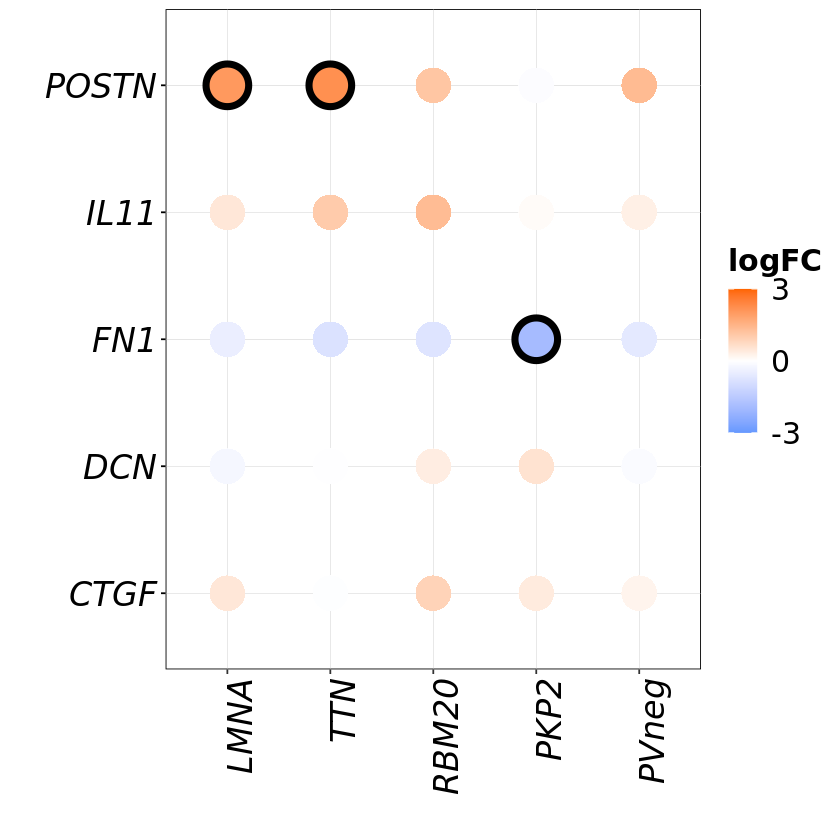

In [333]:
border_ldFC <- ceiling(max(abs(x_sub[,"logFC"])))


g <- ggplot() + 
    geom_point(data=A, aes(x=comparison, y=Gene, fill=logFC), colour="black",pch=21, size=10, stroke=0) + 
    geom_point(data=B, aes(x=comparison, y=Gene, fill=logFC), colour="black",pch=21, size=10, stroke=3) + 
    theme(
              axis.text.x=element_text(size=20, color="black", angle=90, hjust=1, face = "italic"),
              axis.title=element_text(size=20, color="black", face = "bold"),
              axis.text.y=element_text(size=20, color="black", face = "italic"),
              axis.ticks.y=element_line(color="black"),
              plot.title = element_text(size = 25, face = "bold"),
              legend.title=element_text(size=18, face = "bold"), 
              legend.text=element_text(size=18),
              panel.background = element_rect(fill = NA, color="black"),
              panel.grid.major = element_line(colour = "grey", size=0.1),
              panel.grid.minor = element_line(colour = "grey", size=0.1)
             ) + scale_fill_gradient2(low="#6699FF", mid = "white", high="#FF6600", 
                                      breaks=c(-border_ldFC,0,border_ldFC), 
                                      limits=c(-border_ldFC,border_ldFC)) + xlab("")+ ylab("")
g

